# README
This notebook is used to split the dataset.

In [1]:
import numpy as np
import pickle
import pandas as pd
import numpy as np
import random
import os
import json
import matplotlib.pyplot as plt
from batteryml.data.battery_data import BatteryData
random.seed(2024)
np.random.seed(2024)

# SNL dataset

In [5]:
data_path = '/data/trf/python_works/Battery-LLM/dataset/SNL'
tmp_files = os.listdir(data_path)
life_labels = json.load(open('/data/trf/python_works/Battery-LLM/dataset/SNL_labels.json'))
lives = [life_labels[i] for i in tmp_files if i in life_labels]
print(lives)
if np.any(np.array(lives)<=100):
    raise Exception('Battery whose cycle life is no larger than 100 should not be included')

[406, 331, 3768, 600, 3162, 792, 422, 468, 639, 335, 523, 840, 500, 391, 378, 3197, 333, 296, 3139, 382, 2325, 444, 492, 566, 2651, 333, 632, 333, 226, 320, 263, 310, 637, 147, 3842, 250, 406, 337, 428, 143, 2902, 395, 602, 3308, 506, 229, 592, 143, 180, 711, 152, 976]


In [ ]:
# Here is the train_ids provided by BatteryML
data_path = '../dataset/SNL'
tmp_files = os.listdir(data_path)
life_labels = json.load(open('../dataset/SNL_labels.json'))
files = [i for i in tmp_files if i in life_labels]

test_ratio = 0.2
testing_set = random.sample(files, int(len(files)*test_ratio))
training_set = [i for i in files if i not in testing_set]

val_ratio = 0.2

validation_set= random.sample(training_set, int(len(training_set)*0.25))
training_set = [i for i in training_set if i not in validation_set]



assert len(training_set) + len(testing_set) + len(validation_set) == len(files)
print(f'training_set: {len(training_set)} {training_set}')
print(f'Val set: {len(validation_set)} {validation_set}')
print(f'Test set: {len(testing_set)} {testing_set}')

training_set: 30 ['SNL_18650_NCA_25C_0-100_0.5-0.5C_b.pkl', 'SNL_18650_NCA_35C_0-100_0.5-1C_b.pkl', 'SNL_18650_NMC_35C_0-100_0.5-2C_b.pkl', 'SNL_18650_NMC_25C_0-100_0.5-3C_b.pkl', 'SNL_18650_NMC_25C_0-100_0.5-1C_a.pkl', 'SNL_18650_LFP_25C_0-100_0.5-3C_c.pkl', 'SNL_18650_NCA_25C_0-100_0.5-2C_b.pkl', 'SNL_18650_NMC_15C_0-100_0.5-2C_b.pkl', 'SNL_18650_LFP_35C_0-100_0.5-1C_d.pkl', 'SNL_18650_NCA_35C_0-100_0.5-1C_a.pkl', 'SNL_18650_LFP_35C_0-100_0.5-2C_b.pkl', 'SNL_18650_NMC_25C_0-100_0.5-1C_c.pkl', 'SNL_18650_NMC_25C_0-100_0.5-3C_a.pkl', 'SNL_18650_NCA_35C_0-100_0.5-1C_d.pkl', 'SNL_18650_NMC_25C_0-100_0.5-1C_d.pkl', 'SNL_18650_LFP_25C_0-100_0.5-3C_a.pkl', 'SNL_18650_NCA_15C_0-100_0.5-2C_a.pkl', 'SNL_18650_NMC_25C_0-100_0.5-2C_a.pkl', 'SNL_18650_NCA_35C_0-100_0.5-1C_c.pkl', 'SNL_18650_NCA_15C_0-100_0.5-1C_b.pkl', 'SNL_18650_NCA_35C_0-100_0.5-2C_a.pkl', 'SNL_18650_LFP_25C_0-100_0.5-3C_d.pkl', 'SNL_18650_NCA_15C_0-100_0.5-1C_a.pkl', 'SNL_18650_NMC_35C_0-100_0.5-2C_a.pkl', 'SNL_18650_NMC_15C_0

In [7]:
def resample_charge_discharge_curves(voltages, currents, capacity_in_battery):
    '''
    resample the charge and discharge curves
    :param voltages:charge or dicharge voltages
    :param currents: charge or discharge current
    :param capacity_in_battery: remaining capacities in the battery
    :return:interploted records
    '''
    charge_discharge_len = 300 // 2
    raw_bases = np.arange(1, len(voltages)+1)
    interp_bases = np.linspace(1, len(voltages)+1, num=charge_discharge_len,
                                    endpoint=True)
    interp_voltages = np.interp(interp_bases, raw_bases, voltages)
    interp_currents = np.interp(interp_bases, raw_bases, currents)
    interp_capacity_in_battery = np.interp(interp_bases, raw_bases, capacity_in_battery)
    return interp_voltages, interp_currents, interp_capacity_in_battery

trf
[1.624      1.624      1.62355705 1.624      1.624      1.624
 1.624      1.624      1.624      1.624      1.624      1.624
 1.624      1.624      1.624      1.624      1.624      1.624
 1.624      1.624      1.624      1.624      1.624      1.624
 1.624      1.624      1.624      1.624      1.624      1.624
 1.624      1.624      1.624      1.624      1.624      1.624
 1.624      1.624      1.624      1.624      1.624      1.624
 1.624      1.624      1.624      1.624      1.624      1.624
 1.624      1.624      1.624      1.624      1.624      1.624
 1.624      1.624      1.624      1.624      1.624      1.624
 1.624      1.624      1.624      1.624      1.624      1.624
 1.624      1.624      1.624      1.624      1.624      1.624
 1.624      1.624      1.624      1.624      1.624      1.624
 1.624      1.624      1.624      1.624      1.624      1.624
 1.624      1.624      1.624      1.624      1.624      1.624
 1.624      1.624      1.62362416 1.624      1.624      1.624
 1.6

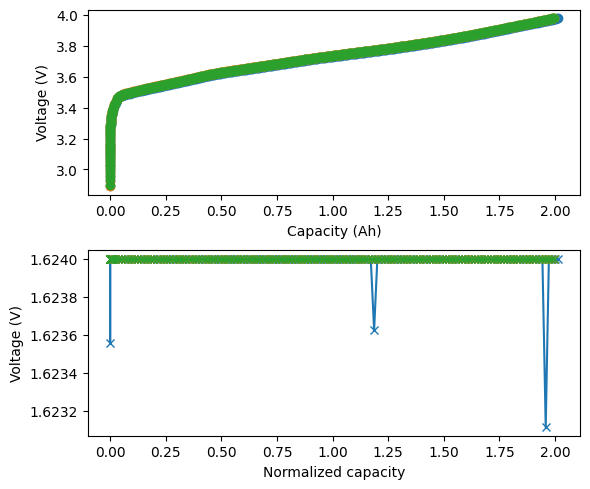

In [15]:
data_path = '/data/trf/python_works/Battery-LLM/dataset/SNL/SNL_18650_NCA_25C_20-80_0.5-0.5C_c.pkl'
data = pickle.load(open(data_path, 'rb'))
is_discharge = False
#data = pickle.load(open('../dataset/HUST/HUST_7-5.pkl', 'rb'))
cycle_data = data['cycle_data']
nominal_capacity = data['nominal_capacity_in_Ah']
need_keys = ['current_in_A', 'voltage_in_V', 'charge_capacity_in_Ah', 'discharge_capacity_in_Ah', 'time_in_s']
prefix = data_path.split('/')[2]
print(prefix)
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(6,5))
for correct_cycle_index, sub_cycle_data in enumerate(cycle_data[5:8]):
    cycle_df = pd.DataFrame()
    for key in need_keys:
        cycle_df[key] = sub_cycle_data[key]    
    cycle_df['cycle_number'] = correct_cycle_index + 1
    cycle_df['cycle_number'] = correct_cycle_index + 1
    cycle_df.loc[cycle_df['charge_capacity_in_Ah']<0] = np.nan
    cycle_df.bfill(inplace=True) # deal with NaN
    voltage_records = cycle_df['voltage_in_V'].values
    current_records = cycle_df['current_in_A'].values
    current_records_in_C = current_records/nominal_capacity
    charge_capacity_records = cycle_df['charge_capacity_in_Ah'].values
    discharge_capacity_records = cycle_df['discharge_capacity_in_Ah'].values

    cutoff_voltage_indices = np.nonzero(current_records_in_C>=0.01) # This includes constant-voltage charge data, 49th cycle of MATR_b1c18 has some abnormal voltage records
    charge_end_index = cutoff_voltage_indices[0][-1] # after charge_end_index, there are rest after charge, discharge, and rest after discharge data

    cutoff_voltage_indices = np.nonzero(current_records_in_C<=-0.01) 
    discharge_end_index = cutoff_voltage_indices[0][-1]
    
    # tmp_discharge_capacity_records = max(charge_capacity_records) - discharge_capacity_records
    if prefix in ['RWTH', 'OX']:
        # Every cycle first discharge and then charge
        #capacity_in_battery = np.where(charge_capacity_records==0, discharge_capacity_records, charge_capacity_records)
        discharge_voltages = voltage_records[:discharge_end_index]
        discharge_capacities = discharge_capacity_records[:discharge_end_index]
        discharge_currents = current_records[:discharge_end_index]
        
        charge_voltages = voltage_records[discharge_end_index:]
        charge_capacities = charge_capacity_records[discharge_end_index:]
        charge_currents = current_records[discharge_end_index:]
        charge_current_in_C = charge_currents / nominal_capacity
        
        charge_voltages = charge_voltages[np.abs(charge_current_in_C)>0.01]
        charge_capacities = charge_capacities[np.abs(charge_current_in_C)>0.01]
        charge_currents = charge_currents[np.abs(charge_current_in_C)>0.01]
    else:
        # Every cycle first charge and then discharge
        #capacity_in_battery = np.where(np.logical_and(current_records>=-(nominal_capacity*0.01), discharge_capacity_records<=nominal_capacity*0.01), charge_capacity_records, discharge_capacity_records)
        discharge_voltages = voltage_records[charge_end_index:]
        discharge_capacities = discharge_capacity_records[charge_end_index:]
        discharge_currents = current_records[charge_end_index:]
        discharge_current_in_C = discharge_currents / nominal_capacity
        
        discharge_voltages = discharge_voltages[np.abs(discharge_current_in_C)>0.01]
        discharge_capacities = discharge_capacities[np.abs(discharge_current_in_C)>0.01]
        discharge_currents = discharge_currents[np.abs(discharge_current_in_C)>0.01]
        
        charge_voltages = voltage_records[:charge_end_index]
        charge_capacities = charge_capacity_records[:charge_end_index]
        charge_currents = current_records[:charge_end_index]

    if is_discharge:
        ax1.plot(discharge_capacities, discharge_voltages, marker='o')
        discharge_voltages, discharge_currents, discharge_capacities = resample_charge_discharge_curves(discharge_voltages, discharge_currents, discharge_capacities)
        ax2.plot(discharge_capacities, discharge_voltages, marker='x')
        if np.any(np.isnan(discharge_currents)) or np.any(np.isnan(discharge_voltages)) or np.any(np.isnan(discharge_capacities)):
            print('aaa')
    else:
        ax1.plot(charge_capacities, charge_voltages, marker='o')
        charge_voltages, charge_currents, charge_capacities = resample_charge_discharge_curves(charge_voltages, charge_currents, charge_capacities)
        ax2.plot(charge_capacities, charge_currents, marker='x')
        
        print(charge_currents)
        if np.any(np.isnan(charge_currents)) or np.any(np.isnan(charge_voltages)) or np.any(np.isnan(charge_capacities)):
            print('aaa')
    # plt.plot(current_records, marker='o', label='current')
    # plt.plot(cycle_df['charge_capacity_in_Ah'].values, marker='o', label='charge Q')
    # plt.plot(cycle_df['discharge_capacity_in_Ah'].values, marker='o', label='discharge Q')


ax2.set_xlabel('Normalized capacity')
ax2.set_ylabel('Voltage (V)')
ax1.set_xlabel('Capacity (Ah)')
ax1.set_ylabel('Voltage (V)')
fig.tight_layout()
plt.subplots_adjust(wspace =0, hspace =0.3)#调整子图间距
plt.show()